# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('./result-lstm-tcp25-hl2-seq3-do0.2-combined-00025.pcap.csv', names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,175.45.176.0-40755-149.171.126.18-25-tcp,0.920455,1,1,1,1053.887794,1,1,1
1,175.45.176.0-60595-149.171.126.17-25-tcp,0.880303,1,1,1,570.517817,0,0,0
2,175.45.176.2-58472-149.171.126.17-25-tcp,0.924747,1,1,1,963.717463,1,1,1
3,175.45.176.2-13352-149.171.126.13-25-tcp,0.406075,0,1,1,650.524038,0,0,0
4,175.45.176.0-3844-149.171.126.12-25-tcp,0.375505,0,1,1,379.938590,0,1,1


In [4]:
df_truth.head()

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


## Exploratory Data Analysis

In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        39157
1         5556
Name: count, dtype: int64

In [6]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           39677
1            5036
Name: count, dtype: int64

In [7]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [8]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [9]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [10]:
df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [11]:
df_pred[df_pred['predicted']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
10,175.45.176.2-30357-149.171.126.16-25-tcp,0.662910,1,1,1,4609.732785,1,1,1,1
41,175.45.176.0-21014-149.171.126.15-25-tcp,0.960101,1,1,1,1514.326005,1,1,1,1
64,175.45.176.1-53096-149.171.126.13-25-tcp,0.399242,0,1,1,386.346222,0,1,1,1
68,175.45.176.1-13963-149.171.126.13-25-tcp,0.374495,0,1,1,382.890068,0,1,1,1
74,175.45.176.3-37532-149.171.126.19-25-tcp,0.923232,1,1,1,954.111448,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
44154,175.45.176.0-40991-149.171.126.11-25-tcp,0.232576,0,1,1,289.514278,0,1,1,1
44165,175.45.176.2-43215-149.171.126.15-25-tcp,0.961869,1,1,1,1905.659591,1,1,1,1
44171,175.45.176.2-30290-149.171.126.13-25-tcp,0.932576,1,1,1,1147.900430,1,1,1,1
44177,175.45.176.2-28720-149.171.126.15-25-tcp,0.663804,1,1,1,669.773399,0,1,0,1


In [12]:
df_pred[df_pred['predicted']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.0-40755-149.171.126.18-25-tcp,0.920455,1,1,1,1053.887794,1,1,1,0
1,175.45.176.0-60595-149.171.126.17-25-tcp,0.880303,1,1,1,570.517817,0,0,0,0
2,175.45.176.2-58472-149.171.126.17-25-tcp,0.924747,1,1,1,963.717463,1,1,1,0
3,175.45.176.2-13352-149.171.126.13-25-tcp,0.406075,0,1,1,650.524038,0,0,0,0
4,175.45.176.0-3844-149.171.126.12-25-tcp,0.375505,0,1,1,379.938590,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
44708,59.166.0.5-7481-149.171.126.2-25-tcp,0.223881,0,1,1,235.609375,0,1,1,0
44709,59.166.0.4-6591-149.171.126.6-25-tcp,0.531566,0,0,0,624.699773,0,0,0,0
44710,149.171.126.2-25-59.166.0.5-7481-tcp,0.615385,1,1,1,495.857798,0,1,1,0
44711,59.166.0.1-41608-149.171.126.1-25-tcp,0.520813,0,0,0,588.456000,0,0,0,0


In [13]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.0-40755-149.171.126.18-25-tcp,0.920455,1,1,1,1053.887794,1,1,1,0
1,175.45.176.0-60595-149.171.126.17-25-tcp,0.880303,1,1,1,570.517817,0,0,0,0
2,175.45.176.2-58472-149.171.126.17-25-tcp,0.924747,1,1,1,963.717463,1,1,1,0
3,175.45.176.2-13352-149.171.126.13-25-tcp,0.406075,0,1,1,650.524038,0,0,0,0
4,175.45.176.0-3844-149.171.126.12-25-tcp,0.375505,0,1,1,379.938590,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
44708,59.166.0.5-7481-149.171.126.2-25-tcp,0.223881,0,1,1,235.609375,0,1,1,0
44709,59.166.0.4-6591-149.171.126.6-25-tcp,0.531566,0,0,0,624.699773,0,0,0,0
44710,149.171.126.2-25-59.166.0.5-7481-tcp,0.615385,1,1,1,495.857798,0,1,1,0
44711,59.166.0.1-41608-149.171.126.1-25-tcp,0.520813,0,0,0,588.456000,0,0,0,0


In [14]:
df_pred[['predicted']].value_counts()

predicted
0            40661
1             4052
Name: count, dtype: int64

In [15]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/ftp/pred_0.0039.csv')

## Calculating Score

In [16]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [17]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
44708,1
44709,0
44710,1
44711,0


### Detection Rate

In [18]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.766781836130306
Recall-Binary-b_iqr: 0.971618953603159
Recall-Binary-b_zscore: 0.9617472852912142
Recall-Floating-f_mean: 0.5782329713721619
Recall-Floating-f_iqr: 0.9042448173741362
Recall-Floating-f_zscore: 0.8677196446199408


### Confussion Matrix

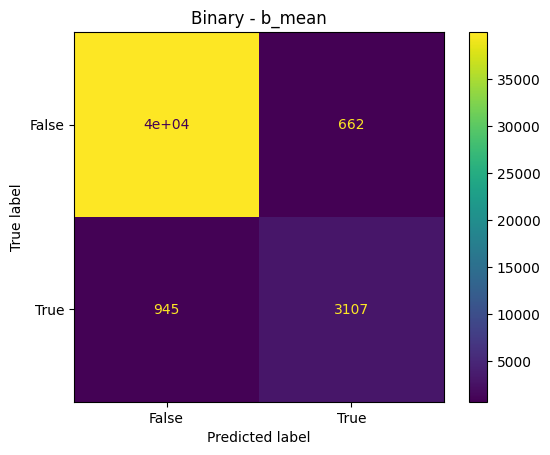

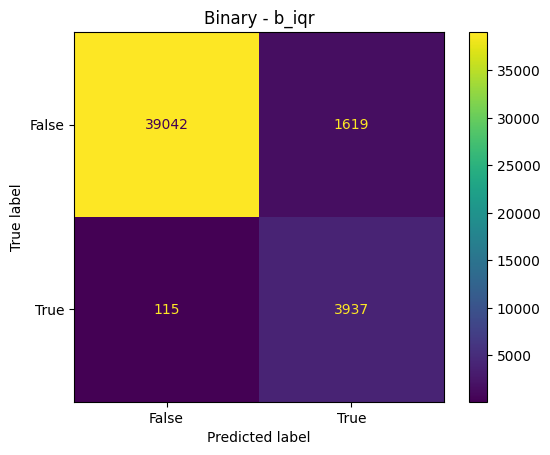

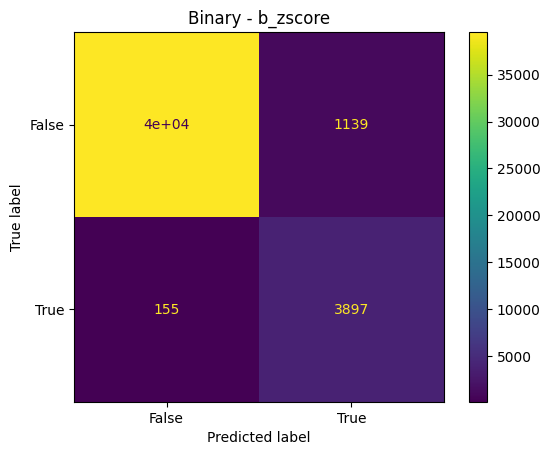

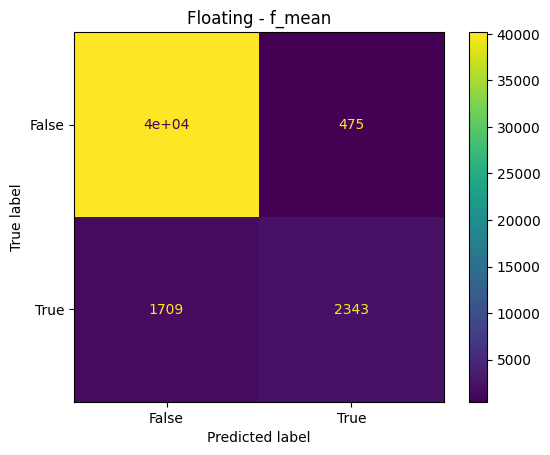

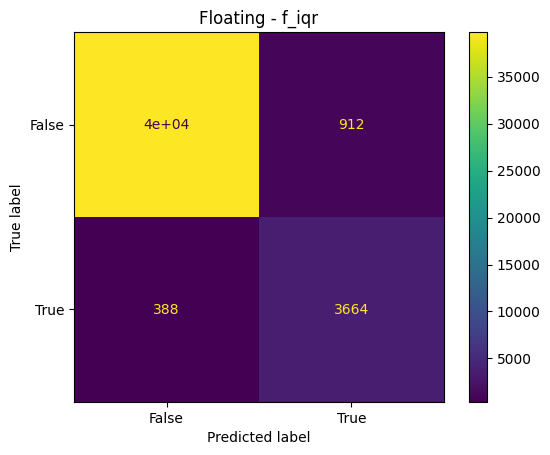

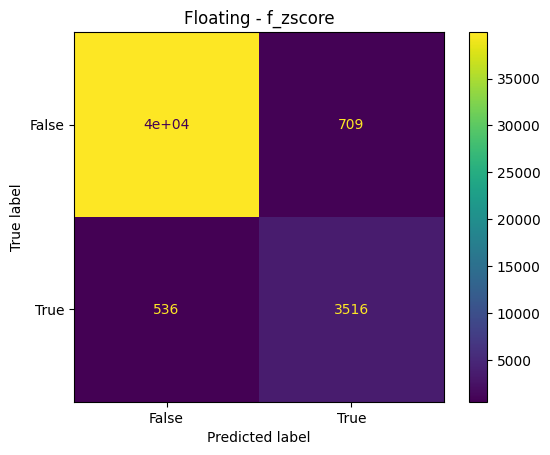

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [20]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.7776442909345748
F2-Binary-b_iqr: 0.9044752802793604
F2-Binary-b_zscore: 0.9172001506307663
F2-Floating-f_mean: 0.6157363607694734
F2-Floating-f_iqr: 0.8814472671285605
F2-Floating-f_zscore: 0.8603729261488768


### FPR Score

In [21]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.016280957182558224
FPR-Binary-b_iqr: 0.03981702368362804
FPR-Binary-b_zscore: 0.02801210004672782
FPR-Floating-f_mean: 0.01168195568234918
FPR-Floating-f_iqr: 0.022429354910110427
FPR-Floating-f_zscore: 0.01743685595533804


In [22]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9640596694473643
Accuracy-Binary-b_iqr: 0.9612193321852704
Accuracy-Binary-b_zscore: 0.9710598707311073
Accuracy-Floating-f_mean: 0.9511551450361192
Accuracy-Floating-f_iqr: 0.9709256815691186
Accuracy-Floating-f_zscore: 0.9721557488873482


In [23]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.766782,0.777644,0.016281,0.964060
b_iqr,0.971619,0.904475,0.039817,0.961219
b_zscore,0.961747,0.917200,0.028012,0.971060
f_mean,0.578233,0.615736,0.011682,0.951155
f_iqr,0.904245,0.881447,0.022429,0.970926
f_zscore,0.867720,0.860373,0.017437,0.972156


In [24]:
df_score.to_excel('score_smtp_0.005.xlsx')